In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_finance import candlestick_ohlc
import math
import datetime


In [0]:
class account_balance:
    def __init__(self, btc, usd):
        self.btc = btc
        self.usd = usd

    def long_or_buy_btc(self, btc_earn, usd_spend):
        self.btc += btc_earn
        self.usd -= usd_spend

    def shout_or_sell_btc(self, btc_spend, usd_earn):
        self.btc -= btc_spend
        self.usd += usd_earn


In [0]:
class trading_data:
    def __init__(self):
        self.data = []

    def add_result(self, new_data):
        data.append(new_data)


In [2]:
class trading_strategy:
    def __init__(self, data):
        self.data = data

    def print_data(self, start, end):
        print(self.data.iloc[start:end,])

    def rolling_mean(self, period, close, sma_colname):
        self.data[sma_colname] = None
        self.data[sma_colname] = self.data[close].rolling(period).mean()

    def candlestick(self, time, open, high, low, close, volume):
        ohlc = self.data[[time, open, high, low, close, volume]]
        fig, ax = plt.subplots(figsize = (10,5))
        
        # plot candlestick
        candlestick_ohlc(ax, ohlc[[time, open, high, low, close, volume]].values, width=1, colorup="g", colordown="r")
        ax.yaxis.set_label_position("left")
        ax.set_ylabel('Price', size=20)
        
        # shift y-limits of the candlestick plot so that there is space at the bottom for the volume bar chart        pad = 0.25
        pad = 0.75
        yl = ax.get_ylim()
        ax.set_ylim(yl[0] - (yl[1] - yl[0])*pad, yl[1])

        # create the second axis for the volume bar-plot
        ax2 = ax.twinx()  

        # set the position of ax2 so that it is short (y2=0.32) but otherwise the same size as ax
        # ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.1],[0.9,0.32]]))

        # make bar plots and color differently depending on up/down for the day
        ohlc_positive = ohlc.loc[ohlc[open] - ohlc[close] <= 0]
        ohlc_negative = ohlc.loc[ohlc[open] - ohlc[close] > 0]

        # plot bar
        ax2.bar(ohlc_positive[time],ohlc_positive[volume],color='red',width=1,align='center')
        ax2.bar(ohlc_negative[time],ohlc_negative[volume],color='green',width=1,align='center')

        #scale the x-axis tight
        ax2.set_xlim(min(ohlc[time]),max(ohlc[time]))
        ax2.yaxis.set_label_position("right")
        ax2.set_ylabel('Volume', size=20)

        # format the x-ticks with a human-readable date. 
        # xt = ax.get_xticks()
        # new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
        # ax.set_xticklabels(new_xticks,rotation=45, horizontalalignment='right')

        # plt.ioff()
        plt.show()

class k_period_transform:
    def __init__(self, data):
        self.data = data

    def k_to_5min(self):

        return self.data

    def k_to_15min(self):
        
        return self.data


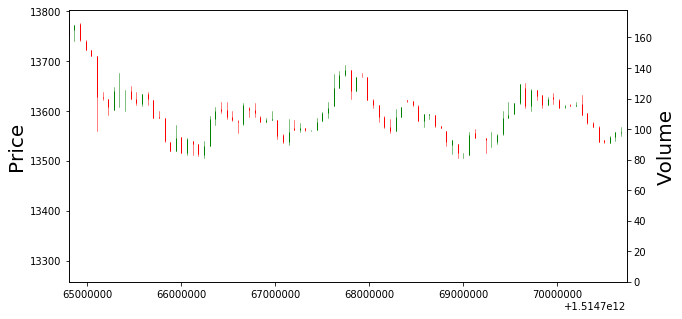

In [3]:
data = pd.read_csv("./BTC_USD_2018.csv", header = None, names = ["Timestamp", "Open", "Close", "High", "Low", "Volume"])
ts_test = trading_strategy(data.iloc[0:100,])
ts_test.candlestick("Timestamp", "Open", "High", "Low", "Close", "Volume")